In [1]:
import pandas as pd
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

<AxesSubplot:>

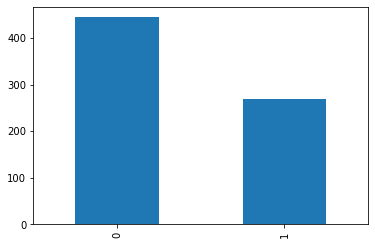

In [3]:
y_train.value_counts().plot(kind='bar')

<AxesSubplot:>

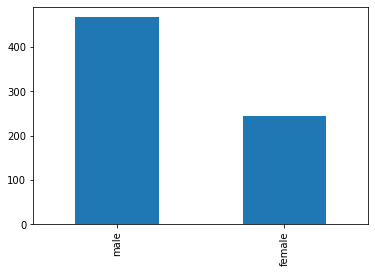

In [4]:
X_train['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

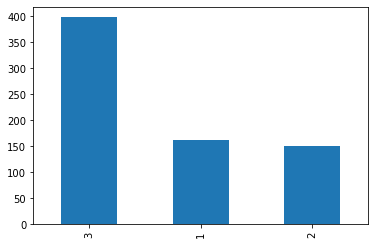

In [5]:
X_train['Pclass'].value_counts().plot(kind='bar')

(array([ 48.,  33., 139., 139.,  91.,  58.,  39.,  19.,   4.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

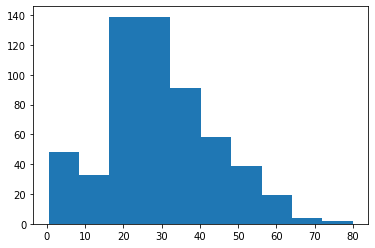

In [6]:
import matplotlib.pyplot as plt
plt.hist(X_train['Age'])

(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

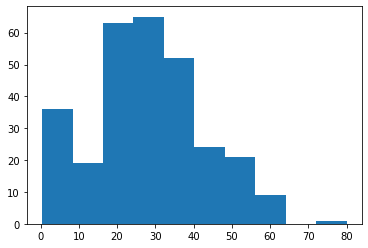

In [7]:
plt.hist(df['Age'][df['Survived'] == 1], bins=10)

(array([ 18.,  16.,  99., 110.,  64.,  45.,  38.,  15.,  13.,   6.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <BarContainer object of 10 artists>)

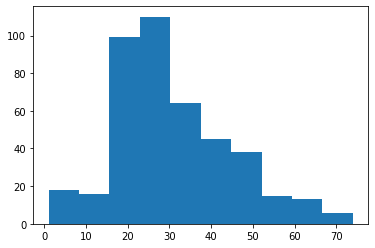

In [8]:
plt.hist(df['Age'][df['Survived'] == 0], bins=10)

In [9]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [10]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
860,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
435,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S


In [11]:
pd.crosstab(index=df["Survived"], columns=df["Pclass"])


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [12]:
pd.crosstab(index=df["Survived"], columns=df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


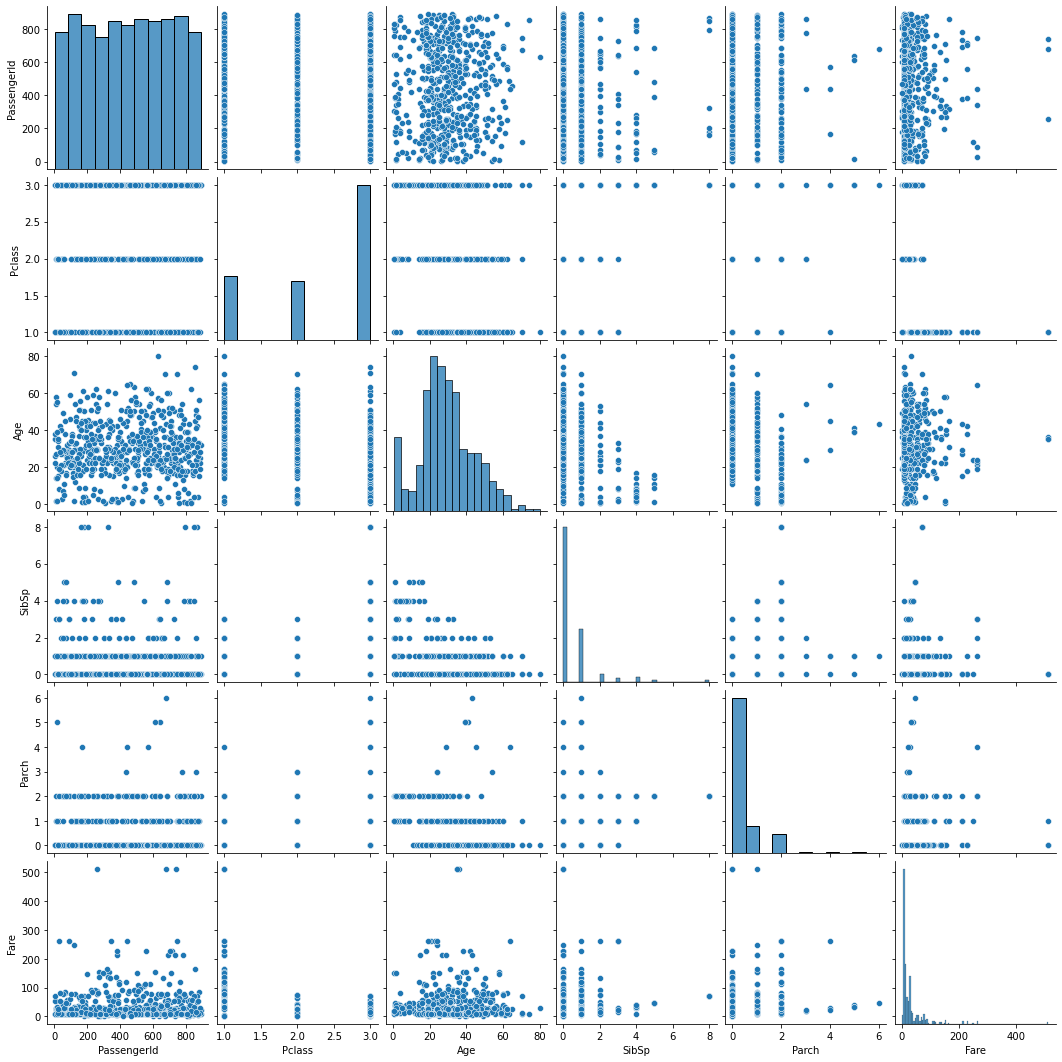

In [13]:
import seaborn as sns
sns.pairplot(X_train)

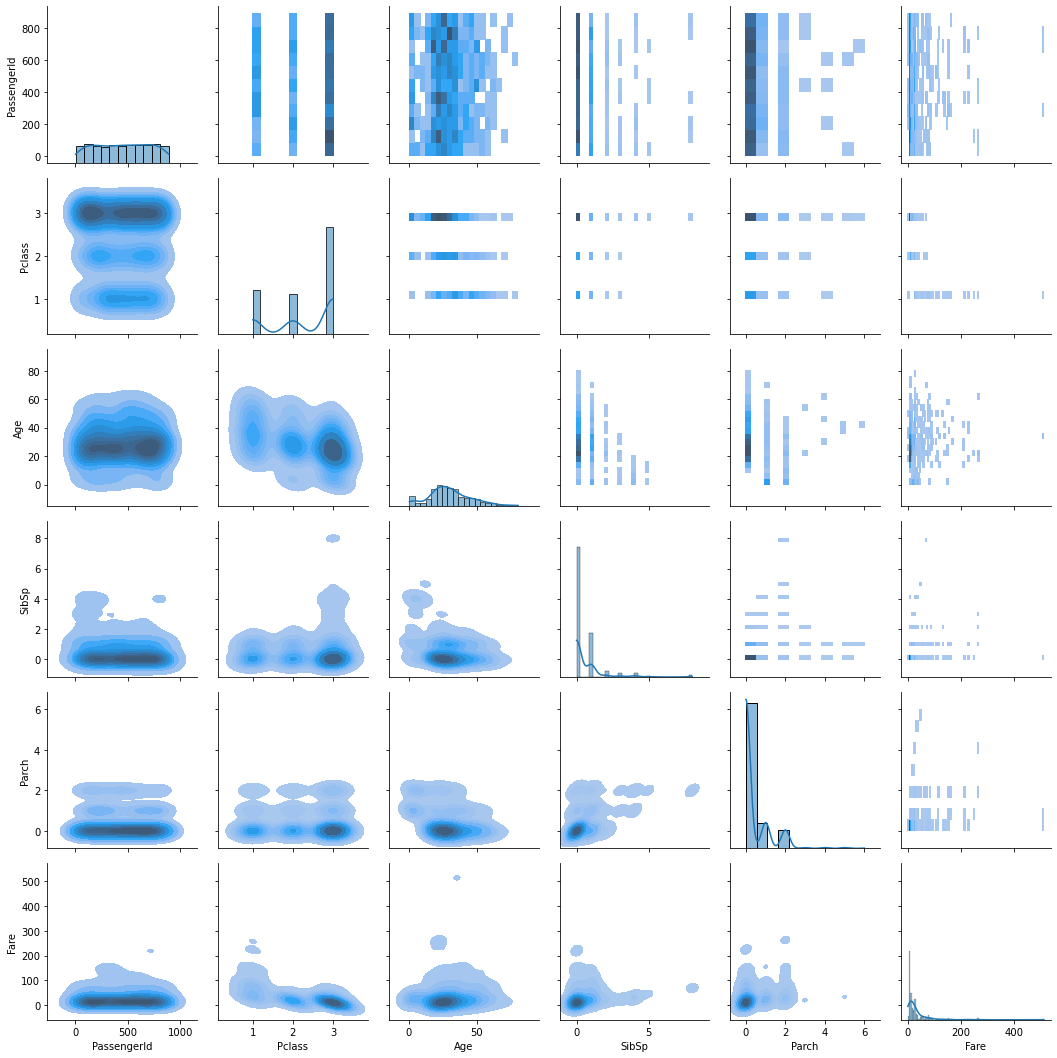

In [14]:
g = sns.PairGrid(X_train)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [15]:
from sklearn.dummy import DummyClassifier
m = DummyClassifier(strategy='most_frequent')
m.fit(X_train, y_train)
ypred = m.predict(X_train)

In [16]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [17]:
round(m.score(X_train, y_train), 3)

0.624

In [18]:
m = DummyClassifier(strategy='stratified')
m.fit(X_train, y_train)
ypred = m.predict(X_train)

In [19]:
ypred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [20]:
round(m.score(X_train, y_train), 3)

0.539

In [21]:
X_train.columns[X_train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

(array([400., 151.,  35.,  34.,  38.,  10.,   8.,   9.,   8.,   2.,   0.,
          0.,   4.,   4.,   1.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <BarContainer object of 30 artists>)

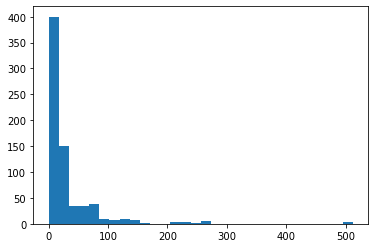

In [22]:
plt.hist(X_train['Fare'], bins=30)

In [23]:
def make_dummy(x):
    if x > 0:
        return 1
    return 0

def family_on_board(data):
    data['fam_dum'] = data[data.columns[0]] + data[data.columns[1]]
    data['fam_dum'] = data['fam_dum'].apply(make_dummy)
    return data[['fam_dum']]

def makesq(data):
    return data**2

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer

impute_then_scale = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)
impute_then_scale_then_sq = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(makesq),
    MinMaxScaler(),
)
impute_then_onehot = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

fe = ColumnTransformer([
    ('impute then scale', impute_then_scale,  ['Age', 'Fare']),
    ('impute then scale and sq', impute_then_scale_then_sq,  ['Age']),
    ('impute then onehot', impute_then_onehot, ['Embarked']),
    ('onehot', OneHotEncoder(sparse=False), ['Sex']),
    ('scale', MinMaxScaler(), ['Pclass']),
    ('family', FunctionTransformer(family_on_board), ['Parch', 'SibSp'])

])

In [25]:
fe.fit(X_train)

ColumnTransformer(transformers=[('impute then scale',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age', 'Fare']),
                                ('impute then scale and sq',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<function makesq at 0x7eff5c5013a0>)),
                                                 ('minmax...
                                ('impute then onehot',
                                 Pipeline(steps=[('simpleimputer',
                         

In [26]:
Xtrans = fe.transform(X_train)

In [27]:
Xtrans[20:55].round(3)

array([[0.133, 0.061, 0.019, 0.   , 0.   , 1.   , 1.   , 0.   , 1.   ,
        1.   ],
       [0.761, 0.012, 0.581, 0.   , 0.   , 1.   , 0.   , 1.   , 1.   ,
        0.   ],
       [0.372, 0.017, 0.141, 0.   , 0.   , 1.   , 1.   , 0.   , 1.   ,
        0.   ],
       [0.083, 0.051, 0.008, 0.   , 0.   , 1.   , 1.   , 0.   , 0.5  ,
        1.   ],
       [0.786, 0.019, 0.62 , 0.   , 0.   , 1.   , 1.   , 0.   , 1.   ,
        0.   ],
       [0.246, 0.014, 0.062, 1.   , 0.   , 0.   , 0.   , 1.   , 1.   ,
        0.   ],
       [0.347, 0.044, 0.122, 1.   , 0.   , 0.   , 1.   , 0.   , 1.   ,
        1.   ],
       [0.359, 0.019, 0.131, 0.   , 0.   , 1.   , 0.   , 1.   , 1.   ,
        0.   ],
       [0.447, 0.234, 0.202, 0.   , 0.   , 1.   , 0.   , 1.   , 0.   ,
        1.   ],
       [0.347, 0.028, 0.122, 1.   , 0.   , 0.   , 0.   , 1.   , 1.   ,
        0.   ],
       [0.623, 0.016, 0.391, 0.   , 0.   , 1.   , 0.   , 1.   , 1.   ,
        0.   ],
       [0.334, 0.413, 0.114, 1.   , 0.   , 

In [28]:
Xtrans_test = fe.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
m = LogisticRegression(class_weight='balanced')
m.fit(Xtrans, y_train)

LogisticRegression(class_weight='balanced')

In [31]:
m.coef_, m.intercept_

(array([[-1.49646000e+00,  2.56322076e-01,  1.78253933e-02,
          2.84448949e-01,  1.09792847e-03, -2.85083644e-01,
          1.22507347e+00, -1.22461024e+00, -1.74502516e+00,
         -2.47199181e-02]]),
 array([2.07272242]))

In [32]:
round(m.score(Xtrans, y_train), 3)

0.77

In [33]:
round(m.score(Xtrans_test, y_test), 3)

0.788

In [34]:
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y_train, Xtrans)
f = logit.fit()
print(f.params)
print(f.summary())

Optimization terminated successfully.
         Current function value: 0.452655
         Iterations 7
x1    -6.070260
x2     0.279208
x3     5.077934
x4     1.351187
x5     1.182933
x6     0.755353
x7     2.968596
x8     0.320878
x9    -2.047293
x10   -0.215845
dtype: float64
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            9
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                  0.3165
Time:                        08:33:29   Log-Likelihood:                -322.29
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 5.427e-59
                 coef    std err          z      P>|z|      [0.025      0.975]
------------

In [35]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()
accuracy = cross_val_score(model, Xtrans, y_train, cv=5, scoring='accuracy')
print("cross-validation scores", accuracy)

cross-validation scores [0.79020979 0.8041958  0.75352113 0.76056338 0.80985915]


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

m = LogisticRegression()

boots = []
for i in range(1000):
    Xb, yb = resample(Xtrans, y_train)
    m.fit(Xb, yb)
    score = m.score(Xb, yb)
    boots.append(score)
    print(i, score)

# get percentiles for 90% confidence
boots.sort()
ci80 = boots[100:-100]
print(f"80% confidence interval: {ci80[0]:5.2} -{ci80[-1]:5.2}")
ci90 = boots[50:-50]
print(f"90% confidence interval: {ci90[0]:5.2} -{ci90[-1]:5.2}")
ci95 = boots[25:-25]
print(f"95% confidence interval: {ci95[0]:5.2} -{ci95[-1]:5.2}")
ci99 = boots[5:-5]
print(f"99% confidence interval: {ci99[0]:5.2} -{ci99[-1]:5.2}")

0 0.7963483146067416
1 0.7724719101123596
2 0.8075842696629213
3 0.7935393258426966
4 0.7893258426966292
5 0.8033707865168539
6 0.8117977528089888
7 0.7542134831460674
8 0.7921348314606742
9 0.8089887640449438
10 0.8188202247191011
11 0.8019662921348315
12 0.800561797752809
13 0.7963483146067416
14 0.7752808988764045
15 0.7893258426966292
16 0.7837078651685393
17 0.7710674157303371
18 0.800561797752809
19 0.800561797752809
20 0.800561797752809
21 0.7907303370786517
22 0.8019662921348315
23 0.8160112359550562
24 0.7893258426966292
25 0.7963483146067416
26 0.7865168539325843
27 0.8188202247191011
28 0.8117977528089888
29 0.8089887640449438
30 0.800561797752809
31 0.8328651685393258
32 0.8047752808988764
33 0.8061797752808989
34 0.7865168539325843
35 0.7907303370786517
36 0.7654494382022472
37 0.8047752808988764
38 0.7949438202247191
39 0.8160112359550562
40 0.7752808988764045
41 0.7808988764044944
42 0.7598314606741573
43 0.776685393258427
44 0.8216292134831461
45 0.8286516853932584
46 0

365 0.7794943820224719
366 0.7907303370786517
367 0.7794943820224719
368 0.8188202247191011
369 0.7823033707865169
370 0.8047752808988764
371 0.7865168539325843
372 0.7921348314606742
373 0.7991573033707865
374 0.773876404494382
375 0.797752808988764
376 0.7598314606741573
377 0.8188202247191011
378 0.7935393258426966
379 0.7879213483146067
380 0.7907303370786517
381 0.7893258426966292
382 0.797752808988764
383 0.8019662921348315
384 0.7907303370786517
385 0.773876404494382
386 0.773876404494382
387 0.8075842696629213
388 0.7963483146067416
389 0.8075842696629213
390 0.8342696629213483
391 0.7808988764044944
392 0.773876404494382
393 0.8047752808988764
394 0.8047752808988764
395 0.8019662921348315
396 0.7935393258426966
397 0.8146067415730337
398 0.8441011235955056
399 0.7991573033707865
400 0.8075842696629213
401 0.7921348314606742
402 0.8188202247191011
403 0.8033707865168539
404 0.7612359550561798
405 0.7963483146067416
406 0.7865168539325843
407 0.797752808988764
408 0.778089887640

732 0.7851123595505618
733 0.7752808988764045
734 0.8061797752808989
735 0.7710674157303371
736 0.7696629213483146
737 0.7626404494382022
738 0.7921348314606742
739 0.7724719101123596
740 0.8033707865168539
741 0.7570224719101124
742 0.7780898876404494
743 0.797752808988764
744 0.7823033707865169
745 0.7963483146067416
746 0.7893258426966292
747 0.8202247191011236
748 0.7893258426966292
749 0.7907303370786517
750 0.800561797752809
751 0.7907303370786517
752 0.8019662921348315
753 0.776685393258427
754 0.7682584269662921
755 0.7935393258426966
756 0.7570224719101124
757 0.8075842696629213
758 0.8019662921348315
759 0.8202247191011236
760 0.8103932584269663
761 0.8047752808988764
762 0.797752808988764
763 0.7935393258426966
764 0.8117977528089888
765 0.7949438202247191
766 0.7752808988764045
767 0.773876404494382
768 0.800561797752809
769 0.8146067415730337
770 0.7893258426966292
771 0.7794943820224719
772 0.7879213483146067
773 0.7696629213483146
774 0.8132022471910112
775 0.81741573033

In [37]:
fe.fit(X)

ColumnTransformer(transformers=[('impute then scale',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age', 'Fare']),
                                ('impute then scale and sq',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<function makesq at 0x7eff5c5013a0>)),
                                                 ('minmax...
                                ('impute then onehot',
                                 Pipeline(steps=[('simpleimputer',
                         

In [38]:
X_trans = fe.transform(X)
m = LogisticRegression(class_weight='balanced')
m.fit(X_trans, y)

LogisticRegression(class_weight='balanced')

In [39]:
round(m.score(X_trans, y), 3)

0.774

In [40]:
test = pd.read_csv('test.csv', index_col=0)

In [41]:
fe.fit(test)
test_trans = fe.transform(test)

In [42]:
test['Survived'] = m.predict(test_trans)


In [43]:
test_trans

array([[0.4527232 , 0.01528158, 0.20606424, ..., 1.        , 1.        ,
        0.        ],
       [0.61756561, 0.01366309, 0.38244151, ..., 0.        , 1.        ,
        1.        ],
       [0.8153765 , 0.01890874, 0.66551079, ..., 1.        , 0.5       ,
        0.        ],
       ...,
       [0.50547277, 0.01415106, 0.25661851, ..., 1.        , 1.        ,
        0.        ],
       [0.35381775, 0.01571255, 0.12620754, ..., 1.        , 1.        ,
        0.        ],
       [0.35381775, 0.0436405 , 0.12620754, ..., 1.        , 1.        ,
        1.        ]])

In [44]:
predict= test[['Survived']]

In [45]:
predict.to_csv('predict2.csv')